In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
## KAGGLE Code URL -- https://www.kaggle.com/datasets/slawekbiel/sartorius-cell-instance-segmentation-coco

from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image as PIL_Image

In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/json-data-1/annotations_val.json
/kaggle/input/json-data-1-test-images-1/7ae19de7bc2a.png
/kaggle/input/json-data-1-test-images-1/d8bfd1dafdc4.png
/kaggle/input/json-data-1-test-images-1/d48ec7815252.png
/kaggle/input/sartorius-cell-instance-segmentation/sample_submission.csv
/kaggle/input/sartorius-cell-instance-segmentation/train.csv
/kaggle/input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/annotations/LIVECell_single_cells/shsy5y/livecell_shsy5y_train.json
/kaggle/input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/annotations/LIVECell_single_cells/shsy5y/livecell_shsy5y_val.json
/kaggle/input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/annotations/LIVECell_single_cells/shsy5y/livecell_shsy5y_test.json
/kaggle/input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/annotations/LIVECell_single_cells/skov3/livecell_skov3_test.json
/kaggle/input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/annotations/LIVEC

loading annotations into memory...
Done (t=0.97s)
creating index...
index created!
---LEN IMAGES ---  3
---LEN axs ---  [[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
--INFO--img_file_path--from JSON ANNOTATIONS FILE--- train/f17f964687b3.png
--INFO--img_file_name--from JSON ANNOTATIONS FILE--- f17f964687b3
--[ERROR]--err_load_display--
 No such file: '/kaggle/working/input_dir/img_dir/train/f17f964687b3.png'


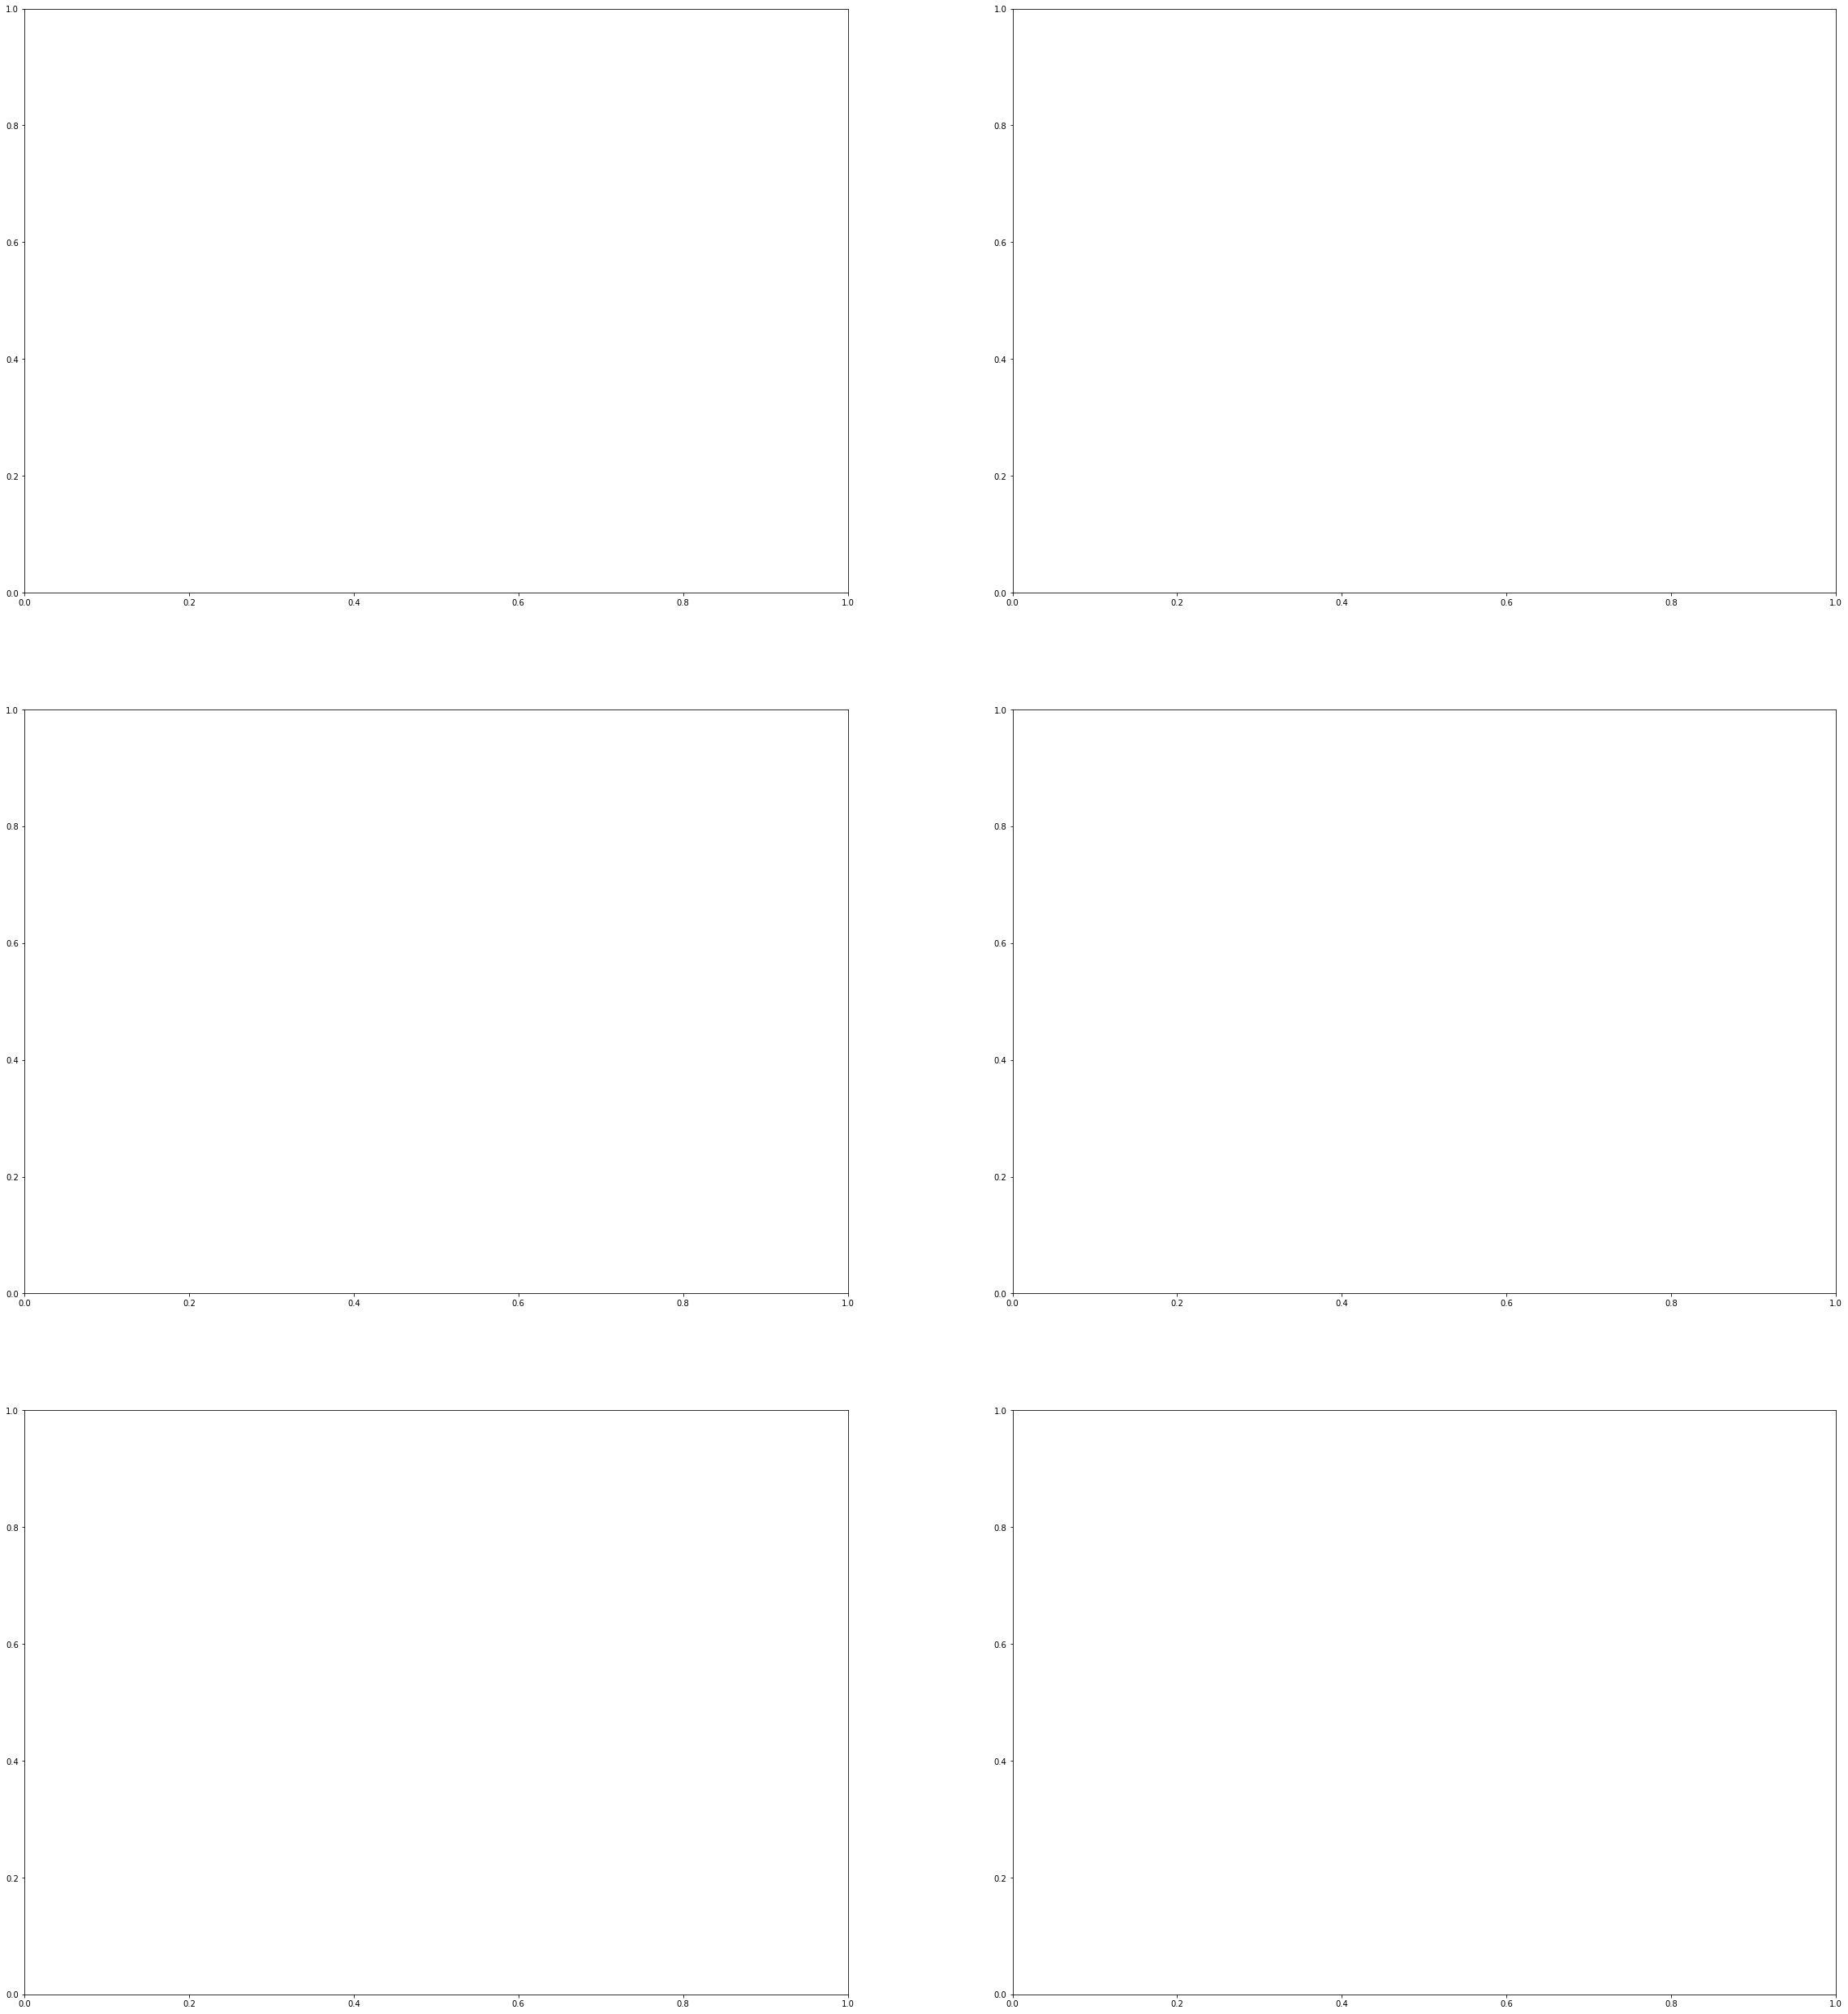

In [8]:
class init_pycoco_tools():
    def __init__(self):
        self.img_data_dir_test=Path('./input_dir/img_dir/test/')
        self.img_data_dir_train=Path('./input_dir/img_dir/')#train/')
        #anno_json_File = Path('./input_dir/json_dir/annotations_val.json')
        anno_json_File = Path("/kaggle/input/json-data-1/annotations_val.json")
        self.coco_obj = COCO(anno_json_File)
        imgIds = self.coco_obj.getImgIds()
        self.imgs = self.coco_obj.loadImgs(imgIds[-3:])
        #input_dir/img_dir/test/7ae19de7bc2a.png
        #kaggle datasets download -d rohitdhankar/json-data-1
        
    def _load_display(self):
        """  """    

        try:
            imgs = self.imgs
            print("---LEN IMAGES --- ",len(imgs))
            coco_obj = self.coco_obj

            _,axs = plt.subplots(len(imgs),2,figsize=(40,15 * len(imgs)))
            print("---LEN axs --- ",axs)

            for img, ax in zip(imgs, axs):
                
                img_file_path = img['file_name']
                print("--INFO--img_file_path--from JSON ANNOTATIONS FILE---",img_file_path)
                img_file_name = img_file_path.rsplit("train/",1)[1]
                img_file_name = img_file_name.rsplit(".png",1)[0]

                print("--INFO--img_file_name--from JSON ANNOTATIONS FILE---",img_file_name)

                #if len(img_file_name) > 0:
                train_img_file_path = str(self.img_data_dir_train) + "/" + str(img_file_path)

                I = io.imread(train_img_file_path)
                print("---TYPE--I---",type(I))

                annIds = coco_obj.getAnnIds(imgIds=[img['id']])
                print("--annIds---",type(annIds))
                print("--annIds--aaa-",annIds)
                #
                anns = coco_obj.loadAnns(annIds)
                print("--ANNO---",type(anns))
                print("--ANNO---",len(anns))

                ax[0].imshow(I)
                print("---type---",type(ax[0]))
                ax[1].imshow(I)
                im_1 = PIL_Image.fromarray(I)
                im_1.save("test_img_"+str(img_file_name)+"_.png")
                plt.sca(ax[1])
                coco_obj.showAnns(anns, draw_bbox=True)
            plt.savefig('test_anno_plots_'+str(img_file_name)+'_.png', bbox_inches='tight', pad_inches=0)

        except Exception as err_load_display:
            print('--[ERROR]--err_load_display--\n',err_load_display)
            pass


if __name__ == "__main__":
    obj_init_pycoco = init_pycoco_tools()
    obj_init_pycoco._load_display()

